# <center> 'Credit Card Approval Prediction' </center>

## <center><u> Index - Notebook 2 </u></center>

#### 1. Scaling the Data using StandardScaler

#### 2. Model Training

    1. Logistic Regression

        1.1 Model Training
        1.2 Model Prediction and Accuracy
        1.3 Confusion Matrix
        1.4 Classification Report
        1.5 ROC Curve (Receiver Operating Characteristic)
        1.6 Cross-Validation
        1.7 Hyperparameter Tuning: GridSearchCV
        1.8 Model with Best Parameters

    2. Decision Tree Classifier

        2.1 Model Training
        2.2 Model Prediction and Accuracy
        2.3 Confusion Matrix
        2.4 Classification Report
        2.5 ROC Curve (Receiver Operating Characteristic)
        2.6 Cross-Validation
        2.7 Hyperparameter Tuning: GridSearchCV
        2.8 Model with Best Parameters

    3. Random Forest Classifier

        3.1 Model Training
        3.2 Model Prediction and Accuracy
        3.3 Confusion Matrix
        3.4 Classification Report
        3.5 ROC Curve (Receiver Operating Characteristic)
        3.6 Cross-Validation
        3.7 Hyperparameter Tuning: GridSearchCV
        3.8 Model with Best Parameters

    4. Support Vector Machines (SVM)

        4.1 Model Training
        4.2 Model Prediction and Accuracy
        4.3 Confusion Matrix
        4.4 Classification Report
        4.5 ROC Curve (Receiver Operating Characteristic)
        4.6 Cross-Validation
        4.7 Hyperparameter Tuning: GridSearchCV
        4.8 Model with Best Parameters

     5. K-Nearest Neighbors (KNN)

        5.1 Model Training
        5.2 Model Prediction and Accuracy
        5.3 Confusion Matrix
        5.4 Classification Report
        5.5 ROC Curve (Receiver Operating Characteristic)
        5.6 Cross-Validation
        5.7 Hyperparameter Tuning: GridSearchCV
        5.8 Model with Best Parameters

    6. Gradient Boosting (XGBoost)

        6.1 Model Training
        6.2 Model Prediction and Accuracy
        6.3 Confusion Matrix
        6.4 Classification Report
        6.5 ROC Curve (Receiver Operating Characteristic)
        6.6 Cross-Validation
        6.7 Hyperparameter Tuning: GridSearchCV
        6.8 Model with Best Parameters

#### 3. Model Selection

        Comparing on the basis of Testing Accuracy, Mean Cross-Validation Accuracy and AUC (Area Under the ROC Curve)

#### 4. Feature Importance on Random Forest Model
        
        Using Entropy 

In [1]:
import pandas as pd  # Data manipulation using DataFrames
import numpy as np  # Numerical operations
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
from sklearn.preprocessing import StandardScaler  # Standardizing numerical features
# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt  
# Machine Learning Models 
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors
import xgboost as xgb  # Gradient Boosting
from sklearn.model_selection import cross_val_score, KFold  # Cross-Validation
# Model Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation metrics
from sklearn.model_selection import GridSearchCV  # Grid search for hyperparameter tuning
from sklearn.metrics import roc_curve, auc  # Receiver Operating Characteristic (ROC) curve
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE # Handling Imbalanced Classes

In [2]:
# Reading the cleaned credit data from a CSV file saved in the notebook 1
Credit_data_cleaned = pd.read_csv('Credit_data_cleaned_ML.csv')

In [3]:
Credit_data_cleaned.columns

Index(['Ind_ID', 'Gender', 'Car_Owner', 'Propert_Owner', 'Annual_income',
       'Type_Income', 'Education', 'Marital_status', 'Housing_type', 'Label',
       'Age', 'Employed_Years', 'Age_Category'],
      dtype='object')

# 1.  Scaling the Data 
Using StandardScaler

In [4]:
# Defining features for model training
features = ['Employed_Years', 'Annual_income', 'Age', 'Type_Income', 'Education', 'Marital_status']
X = Credit_data_cleaned[features]
y = Credit_data_cleaned['Label']

# Performing a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Model Training

## 1. Logistic Regression

### 1.1 Model training

In [5]:
# Creating and fitting the Logistic Regression model 
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

### 1.2 Model Prediction and Accuracy

In [6]:
# Making predictions on the training set
y_train_pred_lr = lr_model.predict(X_train_scaled)

# Calculating training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_lr)
print(f"Calculating training accuracy: {train_accuracy:.2f}")

# Making predictions on the test set
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Calculating testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_lr)
print(f"Calculating testing accuracy: {test_accuracy:.2f}")

Calculating training accuracy: 0.91
Calculating testing accuracy: 0.87


### 1.3 Confusion Matrix

<Figure size 576x432 with 0 Axes>

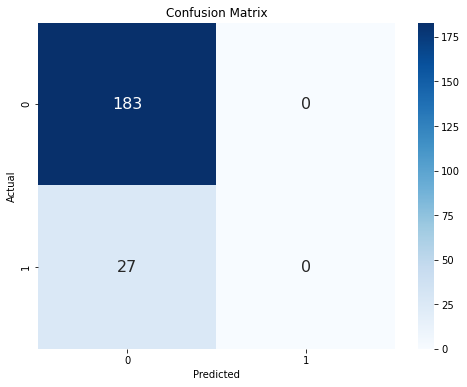

In [7]:
# Calculating the confusion matrix 
conf_matrix_lr = confusion_matrix(y_test, y_test_pred_lr)
plt.figure(figsize=(8, 6))

# Visualizing the confusion matrix with heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

# Adding title and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Displaying the heatmap
plt.show()

### 1.4 Classification Report

In [8]:
# Evaluating the performance of the model
class_report_lr = classification_report(y_test, y_test_pred_lr)
print(class_report_lr)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       183
           1       0.00      0.00      0.00        27

    accuracy                           0.87       210
   macro avg       0.44      0.50      0.47       210
weighted avg       0.76      0.87      0.81       210



### 1.5 Roc Cruve (Receiver Operating Characteristic)

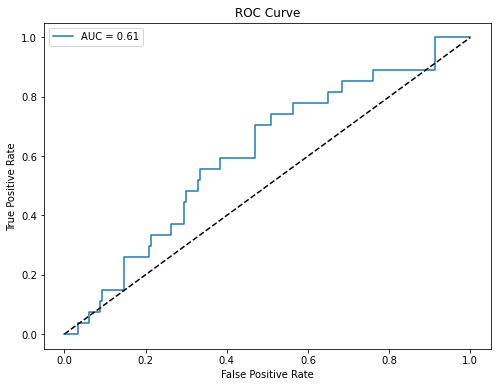

In [9]:
# Calculating the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test_scaled)[:, 1])

# Calculating AUC (Area Under the ROC Curve) 
roc_auc_lr = auc(fpr, tpr)

# Plotting the ROC Curve 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_lr:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### 1.6 Cross Validation 

In [10]:
# Creating a cross-validation object 
random_seed = 42
kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)

# Performing cross-validation for Logistic Regression model
cross_val_accuracy_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=kf, scoring='accuracy')
print(f"Cross-Validation Accuracy (LR): {cross_val_accuracy_lr}")

# Calculating the mean cross-validation accuracy for Logistic Regression
print(f"Mean Cross-Validation Accuracy (LR): {np.mean(cross_val_accuracy_lr):.2f}")

Cross-Validation Accuracy (LR): [0.91071429 0.9047619  0.89221557 0.92215569 0.91616766]
Mean Cross-Validation Accuracy (LR): 0.91


### 1.7  Hyperparameter Tuning: GridSearchCV

In [11]:
# Setting up the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Adjusting the regularization parameter
    'max_iter': [100, 200, 300],  # Setting the maximum number of iterations
}

# Setting up GridSearchCV for logistic regression
grid_search_lr = GridSearchCV(lr_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fitting the model with the training data
grid_search_lr.fit(X_train_scaled, y_train)

# Retrieving the best parameters from the grid search
best_params_lr = grid_search_lr.best_params_
print("Best Parameters (Logistic Regression):", best_params_lr)

Best Parameters (Logistic Regression): {'C': 0.001, 'max_iter': 100}


### 1.8 Model with Best Parameters

In [12]:
# Defining the best hyperparameters for Logistic Regression
best_params_lr = {'C': 0.001, 'max_iter': 100}

# Creating the Logistic Regression model with the best hyperparameters
best_lr_model = LogisticRegression(**best_params_lr, random_state=42)
best_lr_model.fit(X_train_scaled, y_train)
y_pred_lr = best_lr_model.predict(X_test_scaled)

# Calculating the accuracy of the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy (LR): {accuracy_lr:.2f}")

Accuracy (LR): 0.87


## 2. Decision Tree Classifier

- In decision tree models, normalization is not necessary. Decision trees are not sensitive to the scale of the features.

### 2.1 Model training

In [13]:
# Creating and fitting the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 2.2 Model Prediction and Accuracy

In [14]:
# Making predictions on the training set
y_pred_dt = dt_model.predict(X_test)

# Calculating testing accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt:.2f}")

Accuracy: 0.84


### 2.3 Confusion Matrix

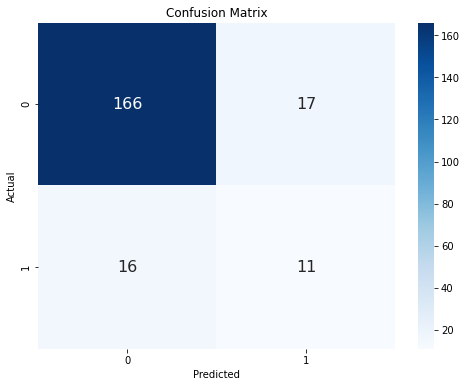

In [15]:
# Calculating the confusion matrix 
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))

# Visualizing the confusion matrix with heatmap 
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

# Adding title and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Displaying the heatmap
plt.show()

### 2.4 Classification Report

In [16]:
# Evaluating the performance of the model
class_report_dt = classification_report(y_test, y_pred_dt)
print(class_report_dt)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       183
           1       0.39      0.41      0.40        27

    accuracy                           0.84       210
   macro avg       0.65      0.66      0.65       210
weighted avg       0.85      0.84      0.84       210



### 2.5 Roc Cruve (Receiver Operating Characteristic)

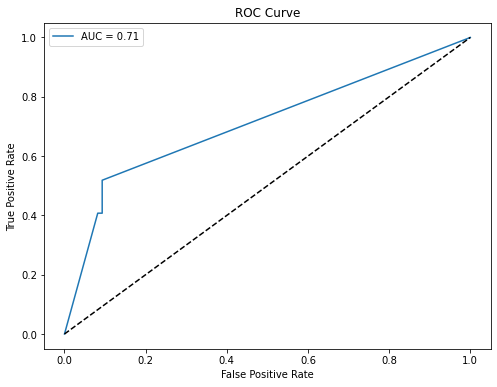

In [17]:
# Calculating the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])

# Calculating AUC (Area Under the ROC Curve) 
roc_auc_dt = auc(fpr, tpr)

# Plotting the ROC Curve 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_dt:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### 2.6 Cross Validation 

In [18]:
# Creating a cross-validation object 
random_seed = 42
kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)

# Performing cross-validation for Decision Tree model
cross_val_accuracy_dt = cross_val_score(dt_model, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Cross-Validation Accuracy (DT): {cross_val_accuracy_dt}")

# Calculating the mean cross-validation accuracy for Decision Tree model
print(f"Mean Cross-Validation Accuracy (DT): {np.mean(cross_val_accuracy_dt):.2f}")

Cross-Validation Accuracy (DT): [0.86904762 0.88095238 0.8502994  0.8742515  0.92814371]
Mean Cross-Validation Accuracy (DT): 0.88


### 2.7  Hyperparameter Tuning: GridSearchCV

In [19]:
# Setting up the parameter grid for grid search
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Setting up GridSearchCV for Decision Tree model
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1)

# Fitting the model with the training data
grid_search_dt.fit(X_train, y_train)

# Retrieving the best parameters from the grid search
best_params_dt = grid_search_dt.best_params_
print("Best Parameters (Decision Tree):", best_params_dt)


Best Parameters (Decision Tree): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


### 2.8 Model with Best Parameters

In [20]:
# Defining the best hyperparameters for Decision Tree model
best_params_dt = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

# Creating the Decision Tree model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(**best_params_dt, random_state=42)
best_dt_model.fit(X_train_scaled, y_train)
y_pred_dt = best_dt_model.predict(X_test_scaled)

# Calculating the accuracy of the Decision Tree model 
accuracy_dt_bp = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy (DT): {accuracy_dt_bp:.2f}")

Accuracy (DT): 0.85


## 3. Random Forest Classifier

### 3.1 Model training

In [21]:
# Creating and fitting the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### 3.2 Model Prediction and Accuracy

In [22]:
# Making predictions on the training set
y_train_pred_rf = rf_model.predict(X_train_scaled)

# Calculating training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_rf)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Making predictions on the test set
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Calculating testing accuracy
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Testing Accuracy: {test_accuracy_rf:.2f}")

Training Accuracy: 0.99
Testing Accuracy: 0.91


### 3.3 Confusion Matrix

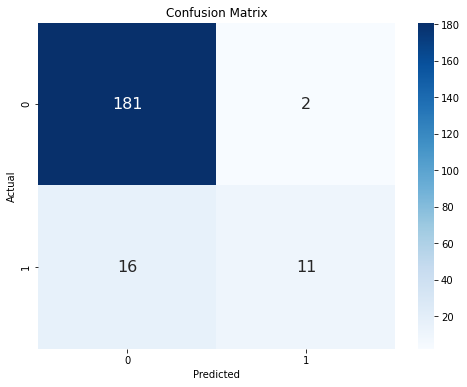

In [23]:
# Calculating the confusion matrix 
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(8, 6))

# Visualizing the confusion matrix with heatmap 
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

# Adding title and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Displaying the heatmap
plt.show()

### 3.4 Classification Report

In [24]:
# Evaluating the performance of the model
class_report_rf = classification_report(y_test, y_test_pred_rf)
print(class_report_rf)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       183
           1       0.85      0.41      0.55        27

    accuracy                           0.91       210
   macro avg       0.88      0.70      0.75       210
weighted avg       0.91      0.91      0.90       210



### 3.5 Roc Cruve (Receiver Operating Characteristic)

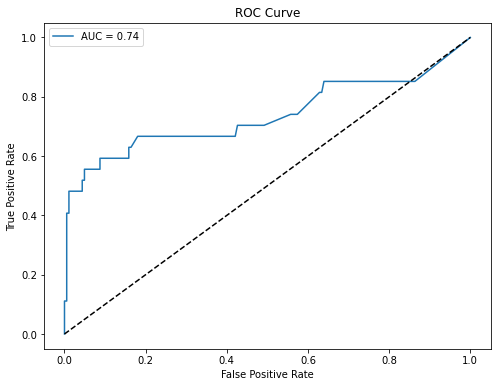

In [25]:
# Calculating the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])

# Calculating AUC (Area Under the ROC Curve) 
roc_auc_rf = auc(fpr, tpr)

# Plotting the ROC Curve 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### 3.6 Cross Validation 

In [26]:
# Creating a cross-validation object 
random_seed = 42
kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)

# Performing cross-validation for Random Forest model
cross_val_accuracy_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=kf, scoring='accuracy')
print(f"Cross-Validation Accuracy (RF): {cross_val_accuracy_rf}")

# Calculating the mean cross-validation accuracy for Random Forest model
print(f"Mean Cross-Validation Accuracy (RF): {np.mean(cross_val_accuracy_rf):.2f}")

Cross-Validation Accuracy (RF): [0.91666667 0.95238095 0.89820359 0.94011976 0.95209581]
Mean Cross-Validation Accuracy (RF): 0.93


### 3.7  Hyperparameter Tuning: GridSearchCV

In [27]:
# Setting up the parameter grid for grid search
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}
# Setting up GridSearchCV for Random Forest model
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)

# Fitting the model with the training data
grid_search_rf.fit(X_train_scaled, y_train)

# Retrieving the best parameters from the grid search
best_params_rf = grid_search_rf.best_params_
print("Best Parameters (Random Forest):", best_params_rf)

Best Parameters (Random Forest): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### 3.8 Model with Best Parameters

In [28]:
# Defining the best hyperparameters for Random Forest model
best_params_rf = {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

# Creating the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_model.fit(X_train_scaled, y_train)
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Calculating the accuracy of the Random Forest model
accuracy_rf_bp = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (RFC): {accuracy_rf_bp:.2f}")

Accuracy (RFC): 0.90


## 4. Support Vector Machines (SVM)

### 4.1 Model training

In [29]:
# Creating and fitting the Support Vector Machine (SVM) model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

### 4.2 Model Prediction and Accuracy

In [30]:
# Making predictions on the training set
y_train_pred_svm = svm_model.predict(X_train_scaled)

# Calculating training accuracy
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
print(f"Training Accuracy (SVM): {train_accuracy_svm:.2f}")

# Making predictions on the test set
y_test_pred_svm = svm_model.predict(X_test_scaled)

# Calculating testing accuracy
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"Testing Accuracy (SVM): {test_accuracy_svm:.2f}")

Training Accuracy (SVM): 0.92
Testing Accuracy (SVM): 0.87


### 4.3 Confusion Matrix

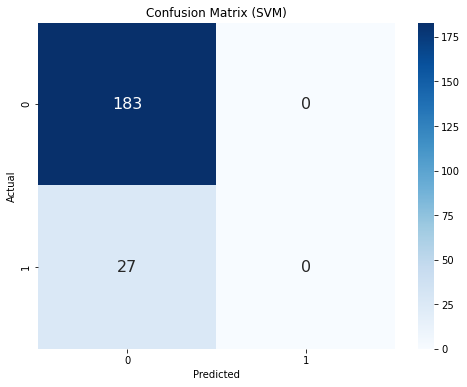

In [31]:
# Calculating the confusion matrix 
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)
plt.figure(figsize=(8, 6))

# Visualizing the confusion matrix with heatmap 
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

# Adding title and labels
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Displaying the heatmap
plt.show()

### 4.4 Classification Report

In [32]:
# Evaluating the performance of the model
class_report_svm = classification_report(y_test, y_test_pred_svm)
print("Classification Report (SVM):\n", class_report_svm)

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       183
           1       0.00      0.00      0.00        27

    accuracy                           0.87       210
   macro avg       0.44      0.50      0.47       210
weighted avg       0.76      0.87      0.81       210



### 4.5 Roc Cruve (Receiver Operating Characteristic)

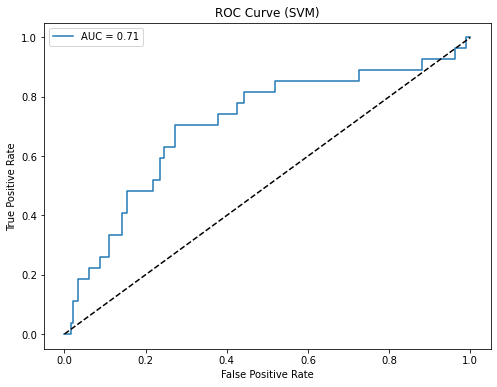

In [33]:
# Calculating the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_model.predict_proba(X_test_scaled)[:, 1])

# Calculating AUC (Area Under the ROC Curve) 
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plotting the ROC Curve 
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'AUC = {roc_auc_svm:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve (SVM)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### 4.6 Cross Validation 

In [34]:
# Creating a cross-validation object 
kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)

# Performing cross-validation for Support Vector Machine (SVM) model
cross_val_accuracy_svm = cross_val_score(svm_model, X_train_scaled, y_train, cv=kf, scoring='accuracy')
print(f"Cross-Validation Accuracy (SVM): {cross_val_accuracy_svm}")

# Calculating the mean cross-validation accuracy for Support Vector Machine (SVM) model
print(f"Mean Cross-Validation Accuracy (SVM): {np.mean(cross_val_accuracy_svm):.2f}")

Cross-Validation Accuracy (SVM): [0.91071429 0.9047619  0.88622754 0.92215569 0.91616766]
Mean Cross-Validation Accuracy (SVM): 0.91


### 4.7  Hyperparameter Tuning: GridSearchCV

In [35]:
# Setting up the parameter grid for grid search
param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf' and 'poly'
}

# Setting up GridSearchCV for Support Vector Machine (SVM) model
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='roc_auc', n_jobs=-1)

# Fitting the model with the training data
grid_search_svm.fit(X_train_scaled, y_train)

# Retrieving the best parameters from the grid search
best_params_svm = grid_search_svm.best_params_
print("Best Parameters (SVM):", best_params_svm)

Best Parameters (SVM): {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


### 4.8 Model with Best Parameters

In [36]:
# Defining the best hyperparameters for Support Vector Machine (SVM) model
best_params_svm = {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

# Creating the Support Vector Machine (SVM) model with the best hyperparameters
best_svm_model = SVC(**best_params_svm, probability=True, random_state=42)
best_svm_model.fit(X_train_scaled, y_train)
y_pred_svm = best_svm_model.predict(X_test_scaled)

# Calculating the accuracy of the Support Vector Machine (SVM) model
accuracy_svm_bp = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy (SVM): {accuracy_svm_bp:.2f}")

Accuracy (SVM): 0.87


## 5. K-Nearest Neighbors (KNN)

### 5.1 Model training

In [37]:
# Creating and fitting the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)  
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

### 5.2 Model Prediction and Accuracy

In [38]:
# Making predictions on the training set
y_train_pred_knn = knn_model.predict(X_train_scaled)

# Calculating training accuracy
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
print(f"Training Accuracy (KNN): {train_accuracy_knn:.2f}")

# Making predictions on the test set
y_test_pred_knn = knn_model.predict(X_test_scaled)

# Calculating testing accuracy
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print(f"Testing Accuracy (KNN): {test_accuracy_knn:.2f}")

Training Accuracy (KNN): 0.94
Testing Accuracy (KNN): 0.88


### 5.3 Confusion Matrix

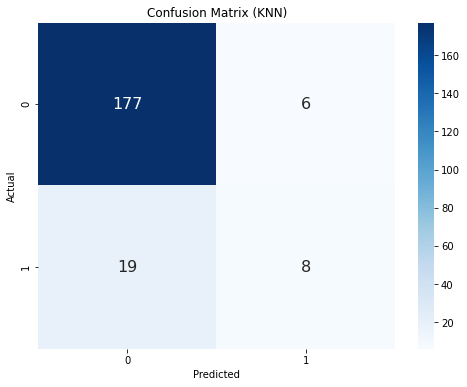

In [39]:
# Calculating the confusion matrix 
conf_matrix_knn = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(8, 6))

# Visualizing the confusion matrix with heatmap 
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

# Adding title and labels
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Displaying the heatmap
plt.show()

### 5.4 Classification Report

In [40]:
# Evaluating the performance of the model
class_report_knn = classification_report(y_test, y_test_pred_knn)
print("Classification Report (KNN):\n", class_report_knn)

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       183
           1       0.57      0.30      0.39        27

    accuracy                           0.88       210
   macro avg       0.74      0.63      0.66       210
weighted avg       0.86      0.88      0.86       210



### 5.5 Roc Cruve (Receiver Operating Characteristic)

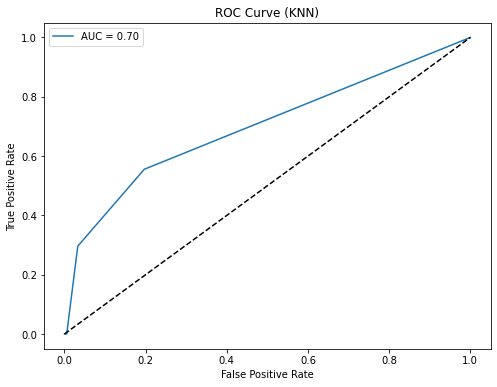

In [41]:
# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])

# Calculating AUC (Area Under the ROC Curve)  
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'AUC = {roc_auc_knn:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve (KNN)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### 5.6 Cross Validation 

In [42]:
# Creating a cross-validation object
random_seed = 42
kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)

# Performing cross-validation for KNN
cross_val_accuracy_knn = cross_val_score(knn_model, X_train_scaled, y_train, cv=kf, scoring='accuracy')
print(f"Cross-Validation Accuracy (KNN): {cross_val_accuracy_knn}")

# Calculating the mean cross-validation accuracy for KNN
print(f"Mean Cross-Validation Accuracy (KNN): {np.mean(cross_val_accuracy_knn):.2f}")

Cross-Validation Accuracy (KNN): [0.89880952 0.89880952 0.85628743 0.91616766 0.90419162]
Mean Cross-Validation Accuracy (KNN): 0.89


### 5.7  Hyperparameter Tuning: GridSearchCV

In [43]:
# Setting up the parameter grid for grid search
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

# Setting up GridSearchCV for KNN
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='roc_auc', n_jobs=-1)

# Fitting the model with the training data
grid_search_knn.fit(X_train_scaled, y_train)

# Retrieving the best parameters from the grid search
best_params_knn = grid_search_knn.best_params_
print("Best Parameters (KNN):", best_params_knn)

Best Parameters (KNN): {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}


### 5.8 Model with Best Parameters

In [44]:
# Defining the best hyperparameters for KNN model
best_params_knn = {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}

# Creating the KNN model with the best hyperparameters
best_knn_model = KNeighborsClassifier(**best_params_knn)
best_knn_model.fit(X_train_scaled, y_train)
y_pred_knn = best_knn_model.predict(X_test_scaled)

# Calculating the accuracy of the KNN model
accuracy_knn_bp = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn_bp:.2f}")

Accuracy (KNN): 0.90


## 6. Gradient Boosting (XGBoost)

### 6.1 Model training

In [45]:
# Creating and fitting the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss',use_label_encoder=False) # Since 'binary:logistic' was changed from 'error' to 'logloss' 
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

### 6.2 Model Prediction and Accuracy

In [46]:
# Making predictions on the training set
y_train_pred_xgb = xgb_model.predict(X_train_scaled)

# Calculating training accuracy
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
print(f"Training Accuracy (XGBoost): {train_accuracy_xgb:.2f}")

# Making predictions on the test set
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

# Calculating testing accuracy
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
print(f"Testing Accuracy (XGBoost): {test_accuracy_xgb:.2f}")

Training Accuracy (XGBoost): 0.99
Testing Accuracy (XGBoost): 0.91


### 6.3 Confusion Matrix

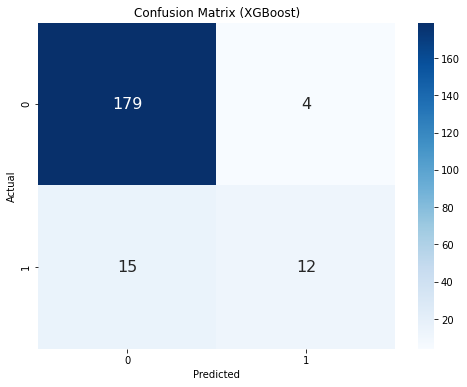

In [47]:
# Calculating the confusion matrix 
conf_matrix_xgb = confusion_matrix(y_test, y_test_pred_xgb)
plt.figure(figsize=(8, 6))

# Visualizing the confusion matrix with heatmap 
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

# Adding title and labels
plt.title("Confusion Matrix (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Displaying the heatmap
plt.show()

### 6.4 Classification Report

In [48]:
# Evaluating the performance of the model
class_report_xgb = classification_report(y_test, y_test_pred_xgb)
print("Classification Report (XGBoost):\n", class_report_xgb)

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       183
           1       0.75      0.44      0.56        27

    accuracy                           0.91       210
   macro avg       0.84      0.71      0.75       210
weighted avg       0.90      0.91      0.90       210



### 6.5 Roc Cruve (Receiver Operating Characteristic)

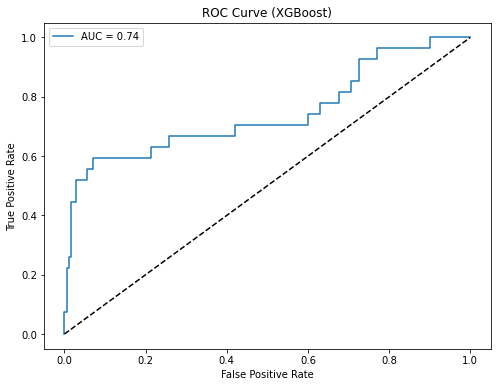

In [49]:
# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])

# Calculating AUC (Area Under the ROC Curve) 
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plotting the ROC Curve 
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'AUC = {roc_auc_xgb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve (XGBoost)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### 6.6 Cross Validation 

In [50]:
# Creating a cross-validation object 
random_seed = 42
kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)

# Performing cross-validation for XGBoost model
cross_val_accuracy_xgboost = cross_val_score(xgb_model, X_train_scaled, y_train, cv=kf, scoring='accuracy')
print(f"Cross-Validation Accuracy (XGBoost): {cross_val_accuracy_xgboost}")

# Calculating the mean cross-validation accuracy for XGBoost model
print(f"Mean Cross-Validation Accuracy (XGBoost): {np.mean(cross_val_accuracy_xgboost):.2f}")

Cross-Validation Accuracy (XGBoost): [0.91666667 0.94047619 0.89221557 0.92814371 0.94011976]
Mean Cross-Validation Accuracy (XGBoost): 0.92


### 6.7  Hyperparameter Tuning: GridSearchCV

In [51]:
# Setting up the parameter grid for grid search
param_grid_xgboost = {
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used to prevent overfitting
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'subsample': [0.8, 1.0],  # Fraction of samples used for fitting the individual trees
}

# Setting up GridSearchCV for XGBoost model
grid_search_xgboost = GridSearchCV(xgb_model, param_grid_xgboost, cv=5, scoring='roc_auc', n_jobs=-1)

# Fitting the model with the training data
grid_search_xgboost.fit(X_train_scaled, y_train)

# Retrieving the best parameters from the grid search
best_params_xgboost = grid_search_xgboost.best_params_
print("Best Parameters (XGBoost):", best_params_xgboost)

Best Parameters (XGBoost): {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}


### 6.8 Model with Best Parameters

In [52]:
# Defining the best hyperparameters for XGBoost
best_params_xgboost = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8}

# Creating the XGBoost model with the best hyperparameters
best_xgboost_model = xgb.XGBClassifier(**best_params_xgboost, random_state=42, eval_metric='logloss',use_label_encoder=False)
best_xgboost_model.fit(X_train_scaled, y_train)
y_pred_xgboost = best_xgboost_model.predict(X_test_scaled)

# Calculating the accuracy of the XGBoost
accuracy_xgboost_pb = accuracy_score(y_test, y_pred_xgboost)
print(f"Accuracy (XGBoost): {accuracy_xgboost_pb:.2f}")

Accuracy (XGBoost): 0.88


# 3. Model Selection

In [53]:
variables = {
    'Logistic Regression': [test_accuracy, accuracy_lr, cross_val_accuracy_lr, roc_auc_lr],
    'Decision Tree': [accuracy_dt, accuracy_dt_bp, cross_val_accuracy_dt, roc_auc_dt],
    'Random Forest': [test_accuracy_rf, accuracy_rf_bp, cross_val_accuracy_rf, roc_auc_rf],
    'Support Vector Machine': [test_accuracy_svm, accuracy_svm_bp, cross_val_accuracy_svm, roc_auc_svm],
    'K-Nearest Neighbour': [test_accuracy_knn, accuracy_knn_bp, cross_val_accuracy_knn, roc_auc_knn],
    'Gradient Boosting': [test_accuracy_xgb, accuracy_xgboost_pb, cross_val_accuracy_xgboost, roc_auc_xgb]
}

# Calculate mean for the "Mean Cross-Validation Accuracy" column
for model, vars_list in variables.items():
    vars_list[2] = sum(vars_list[2]) / len(vars_list[2])

# Convert the dictionary to a DataFrame
model_selection_df = pd.DataFrame.from_dict(variables, orient='index', columns=['Testing Accuracy before Hypertuning', 'Testing Accuracy after Hypertuning', 'Mean Cross-Validation Accuracy', 'AUC'])

# Format all values to two decimal places
model_selection_df = model_selection_df.applymap(lambda x: f'{x:.2f}' if isinstance(x, (float, int)) else x)

# Display the results
model_selection_df


,Testing Accuracy before Hypertuning,Testing Accuracy after Hypertuning,Mean Cross-Validation Accuracy,AUC
Logistic Regression,0.87,0.87,0.91,0.61
Decision Tree,0.84,0.85,0.88,0.71
Random Forest,0.91,0.90,0.93,0.74
Support Vector Machine,0.87,0.87,0.91,0.71
K-Nearest Neighbour,0.88,0.90,0.89,0.70
Gradient Boosting,0.91,0.88,0.92,0.74


#### Testing Accuracy:

- **Random Forest:** It has the highest testing accuracy after hypertuning (0.90). This suggests that, on the test set, it performs well in correctly predicting credit card approval.

#### Mean Cross-Validation Accuracy:

- **Random Forest:** It again shows the highest mean cross-validation accuracy (0.93). This indicates consistent and robust performance across different subsets of the training data.

#### AUC (Area Under the ROC Curve):

- **Random Forest and Gradient Boosting:** Both have the highest AUC values (0.74), indicating good discrimination ability between positive and negative classes.

### Model Selected - Random Forest

# 4. Feature Importance on Random Forest Model 
Using Entropy

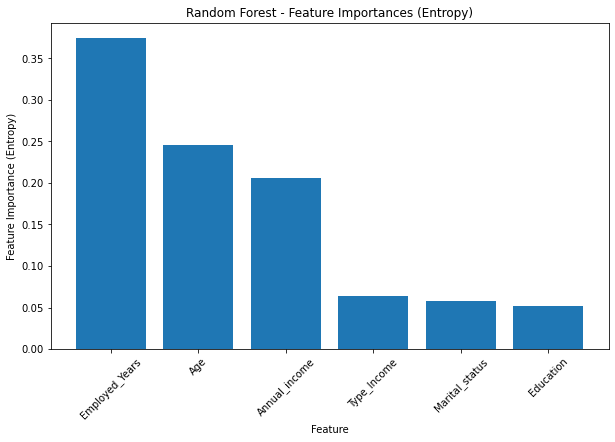

In [54]:
# Extracting feature importances
feature_importances_entropy = best_rf_model.feature_importances_

# Getting the names of features
feature_names_entropy = X_train.columns

# Sorting feature importances in descending order
indices_entropy = feature_importances_entropy.argsort()[::-1]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances_entropy[indices_entropy], align="center")
plt.xticks(range(X_train.shape[1]), feature_names_entropy[indices_entropy], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Feature Importance (Entropy)")
plt.title("Random Forest - Feature Importances (Entropy)")
plt.show()